In [1]:
# This is Homework 07a (Ames Housing Part I - EDA and Cleaning) 
# of the "Data Science" class at Technische Hochschule Rosenheim

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# make the plots look nice
sns.set(style="darkgrid")
snscolor='mediumseagreen'
sns.set(font_scale=0.7) 

# The Ames Housing Dataset - Part I

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). Quality of the data is overall good, but there may be some outliers. 

You can find a detailed description of all attributes in `'data/DataDocBrief.txt'`. 

**Start by studying the attributes!**

We intend to use this data to predict the value (`SalePrice`) of a property given its attributes. Clearly, the above ground living area (`GrLivArea`, in German: Wohnfläche) will be the most important indicator, but many others will influence the price as well. 

## Load and explore the data

In [4]:
# The first column (Order) is the index key, all others columns are data columns
columns = ['Order','PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice']
columns_discrete = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                    'MoSold', 'YrSold']
columns_continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                      'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

columns_numeric = columns_discrete + columns_continuous
columns_categorical = [c for c in columns if not (c in columns_numeric or c=='Order')]

In [5]:
# construct the column types
# set all columns to str by default and change the numeric ones to float
col_types = {c : str for c in columns} 
col_types = {**col_types, **{c : float for c in columns_numeric}}

In [6]:
ames = pd.read_excel('data/AmesHousing.xls', index_col='Order', names=columns, dtype = col_types)

### Exercise I.1

The dataframe we just read does contain NaN values (missing values), however, in reality, the data does not contain missing values. Replace all NaN values by `0` for numeric columns and by `'NA'` for nominal columns.

In [7]:
#---------- SOLUTIONS ----------

In [8]:
# let's see how many NaN we have
ames.isna().sum().sum()

13997

In [9]:
# fill numeric NaN with 0, as 0 is coded as NaN in the Excel file
ames[columns_numeric] = ames[columns_numeric].fillna(value=0)
# as read_excel converts NA (not applicable) to NaN, let's convert this back
ames = ames.fillna(value='NA')

In [10]:
# verify that we do not have any missing values any more
ames.isna().sum().sum()

0

## EDA

### Exercise I.2

Explore the results of the following `describe` function carefully. You will note one very obvious error in the data. Explore the affected feature visually, decide how to handle this mistake and implement your solution.

In [11]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2930.0,57.647782,33.499441,0.0,43.00,63.0,78.00,313.0
LotArea,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
YearBuilt,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
YearRemodAdd,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
MasVnrArea,2930.0,101.096928,178.634545,0.0,0.00,0.0,162.75,1600.0
BsmtFinSF1,2930.0,442.478498,455.586452,0.0,0.00,370.0,734.00,5644.0
BsmtFinSF2,2930.0,49.705461,169.142089,0.0,0.00,0.0,0.00,1526.0
BsmtUnfSF,2930.0,559.071672,439.540571,0.0,219.00,465.5,801.75,2336.0
TotalBsmtSF,2930.0,1051.255631,440.968018,0.0,793.00,990.0,1301.50,6110.0
1stFlrSF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0


In [12]:
#---------- SOLUTION ----------

Interpretation: at first glance, these values look reasonable, apart from the maximum of 2207 for the "Garage Yr Blt".

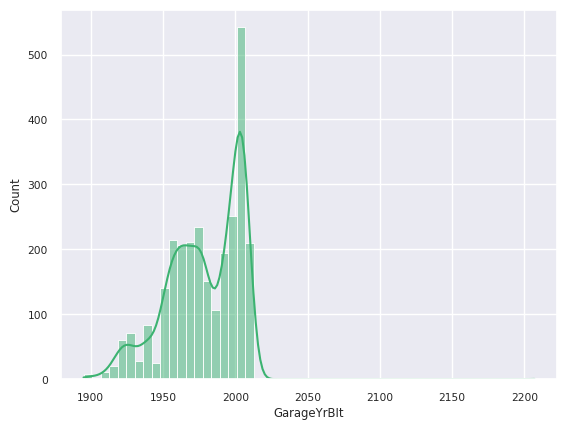

In [13]:
# let's look at the Garage Yr Blt (for the ones, that actually do have a garage, i.e. where the year > 0
_=sns.histplot(data=ames[ames.GarageYrBlt>0], x='GarageYrBlt', kde=True, color=snscolor)

In [14]:
ames.GarageYrBlt.value_counts().sort_index()

0.0       159
1895.0      1
1896.0      1
1900.0      6
1906.0      1
         ... 
2007.0    115
2008.0     61
2009.0     29
2010.0      5
2207.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [15]:
print(ames[ames.GarageYrBlt==2207].YearBuilt)

Order
2261    2006.0
Name: YearBuilt, dtype: float64


Interpretation: The year 2207 for the garage built is cleary not possible. As the house was built in 2006, we can be very confident that this is simply a type and should be 2007, so let's correct it.

In [16]:
ames.at[2261, 'GarageYrBlt'] = 2007

### Univariate EDA

Let's explore the univariate distributions of each feature.

### Exercise I.3

* visualize the target with an appropriate visualization and interpret the result
* visualize the continuous features with an appropriate visualization and interpret the result
* visualize the discrete features with an appropriate visualization and interpret the result
* visualize the categorical features with an appropriate visualization and interpret the result

In [17]:
#---------- SOLUTION ----------

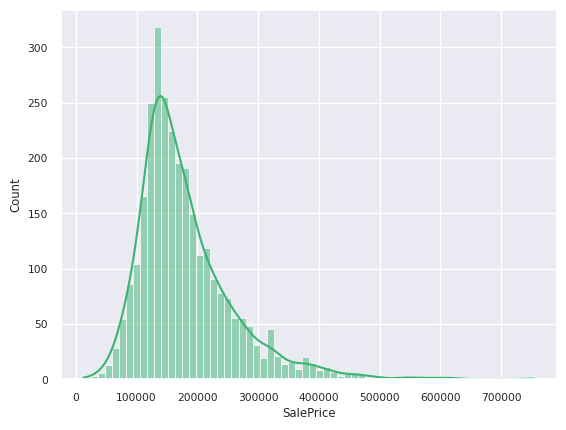

In [18]:
# let's look at the target (SalesPrice)
_=sns.histplot(data=ames, x="SalePrice", kde=True, color=snscolor)

Interpretation: This looks reasonable, but there seem to be a couple of very expensive properties in the dataset. 

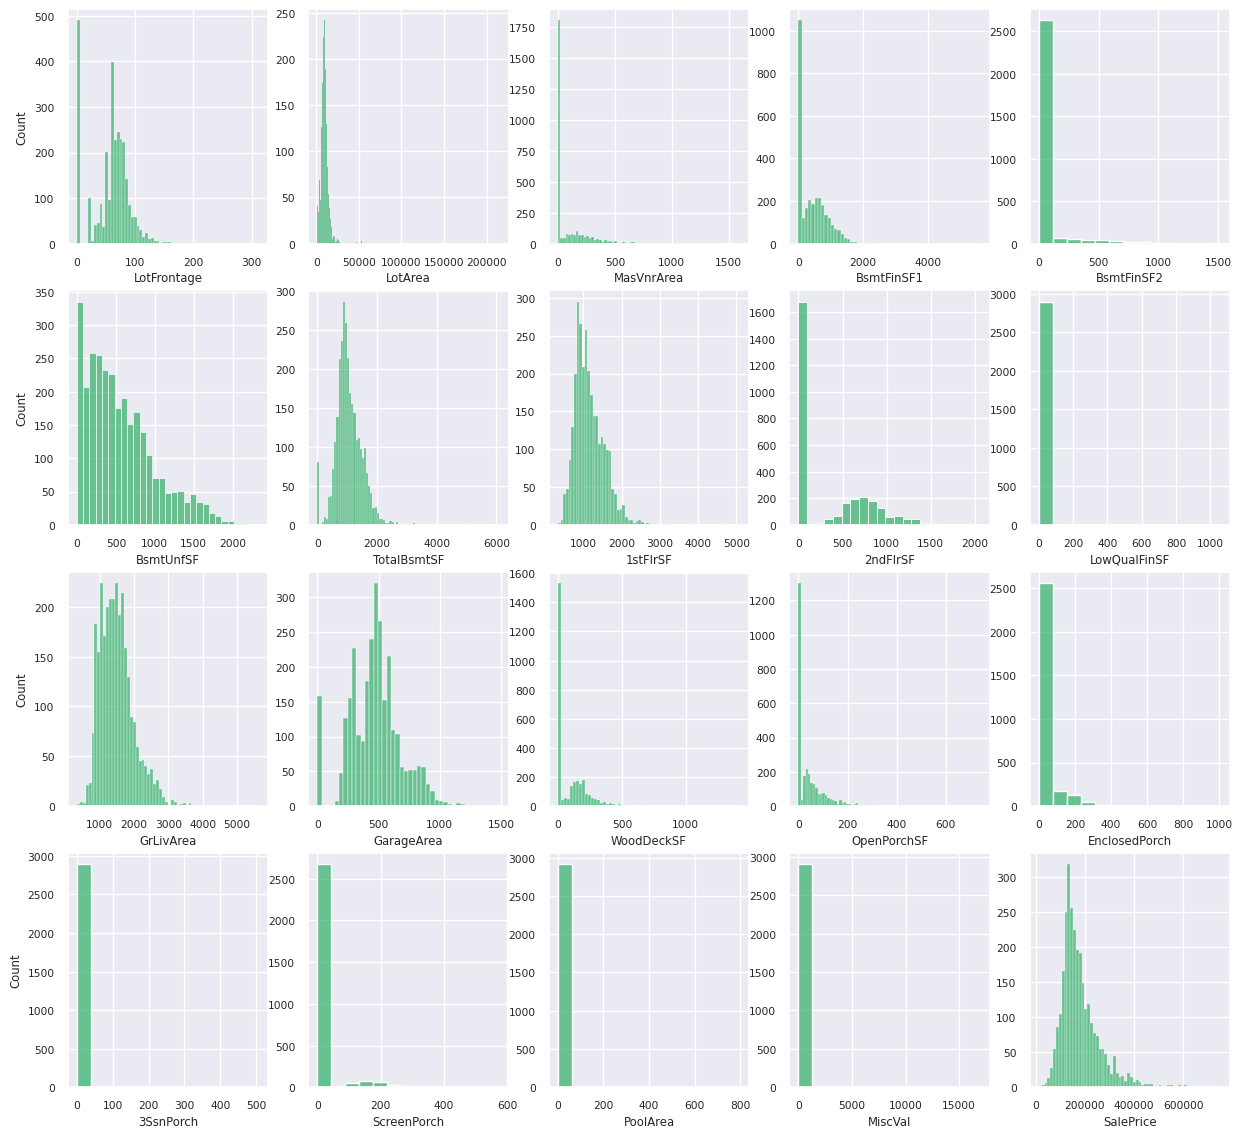

In [19]:
fig, axs = plt.subplots(4, 5, figsize=(15, 4*3.5))
for i in range(len(columns_continuous)):
    ax = axs[i//5, i%5]
    sns.histplot(data=ames, x=columns_continuous[i], kde=False, color=snscolor, ax=ax)
    if i%5 != 0: ax.set_ylabel("")

Interpretation: there are some very large values in the square-foot areas. We should look into this!

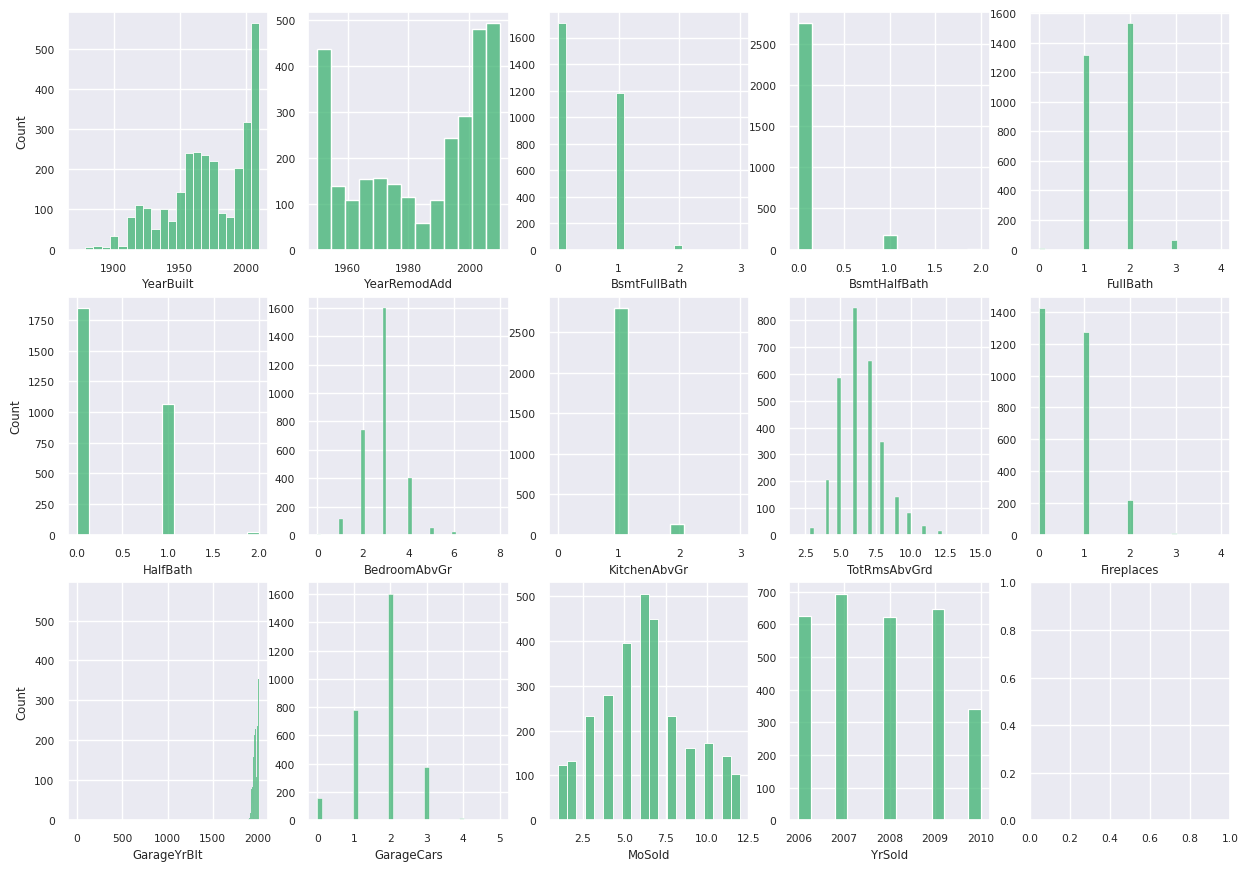

In [20]:
fig, axs = plt.subplots(3, 5, figsize=(15,3*3.5))
for i in range(len(columns_discrete)):
    ax = axs[i//5, i%5]
    sns.histplot(data=ames, x=columns_discrete[i], kde=False, color=snscolor, ax=ax)
    if i%5 != 0: ax.set_ylabel("")

Interpretation: nothing of interest noted.

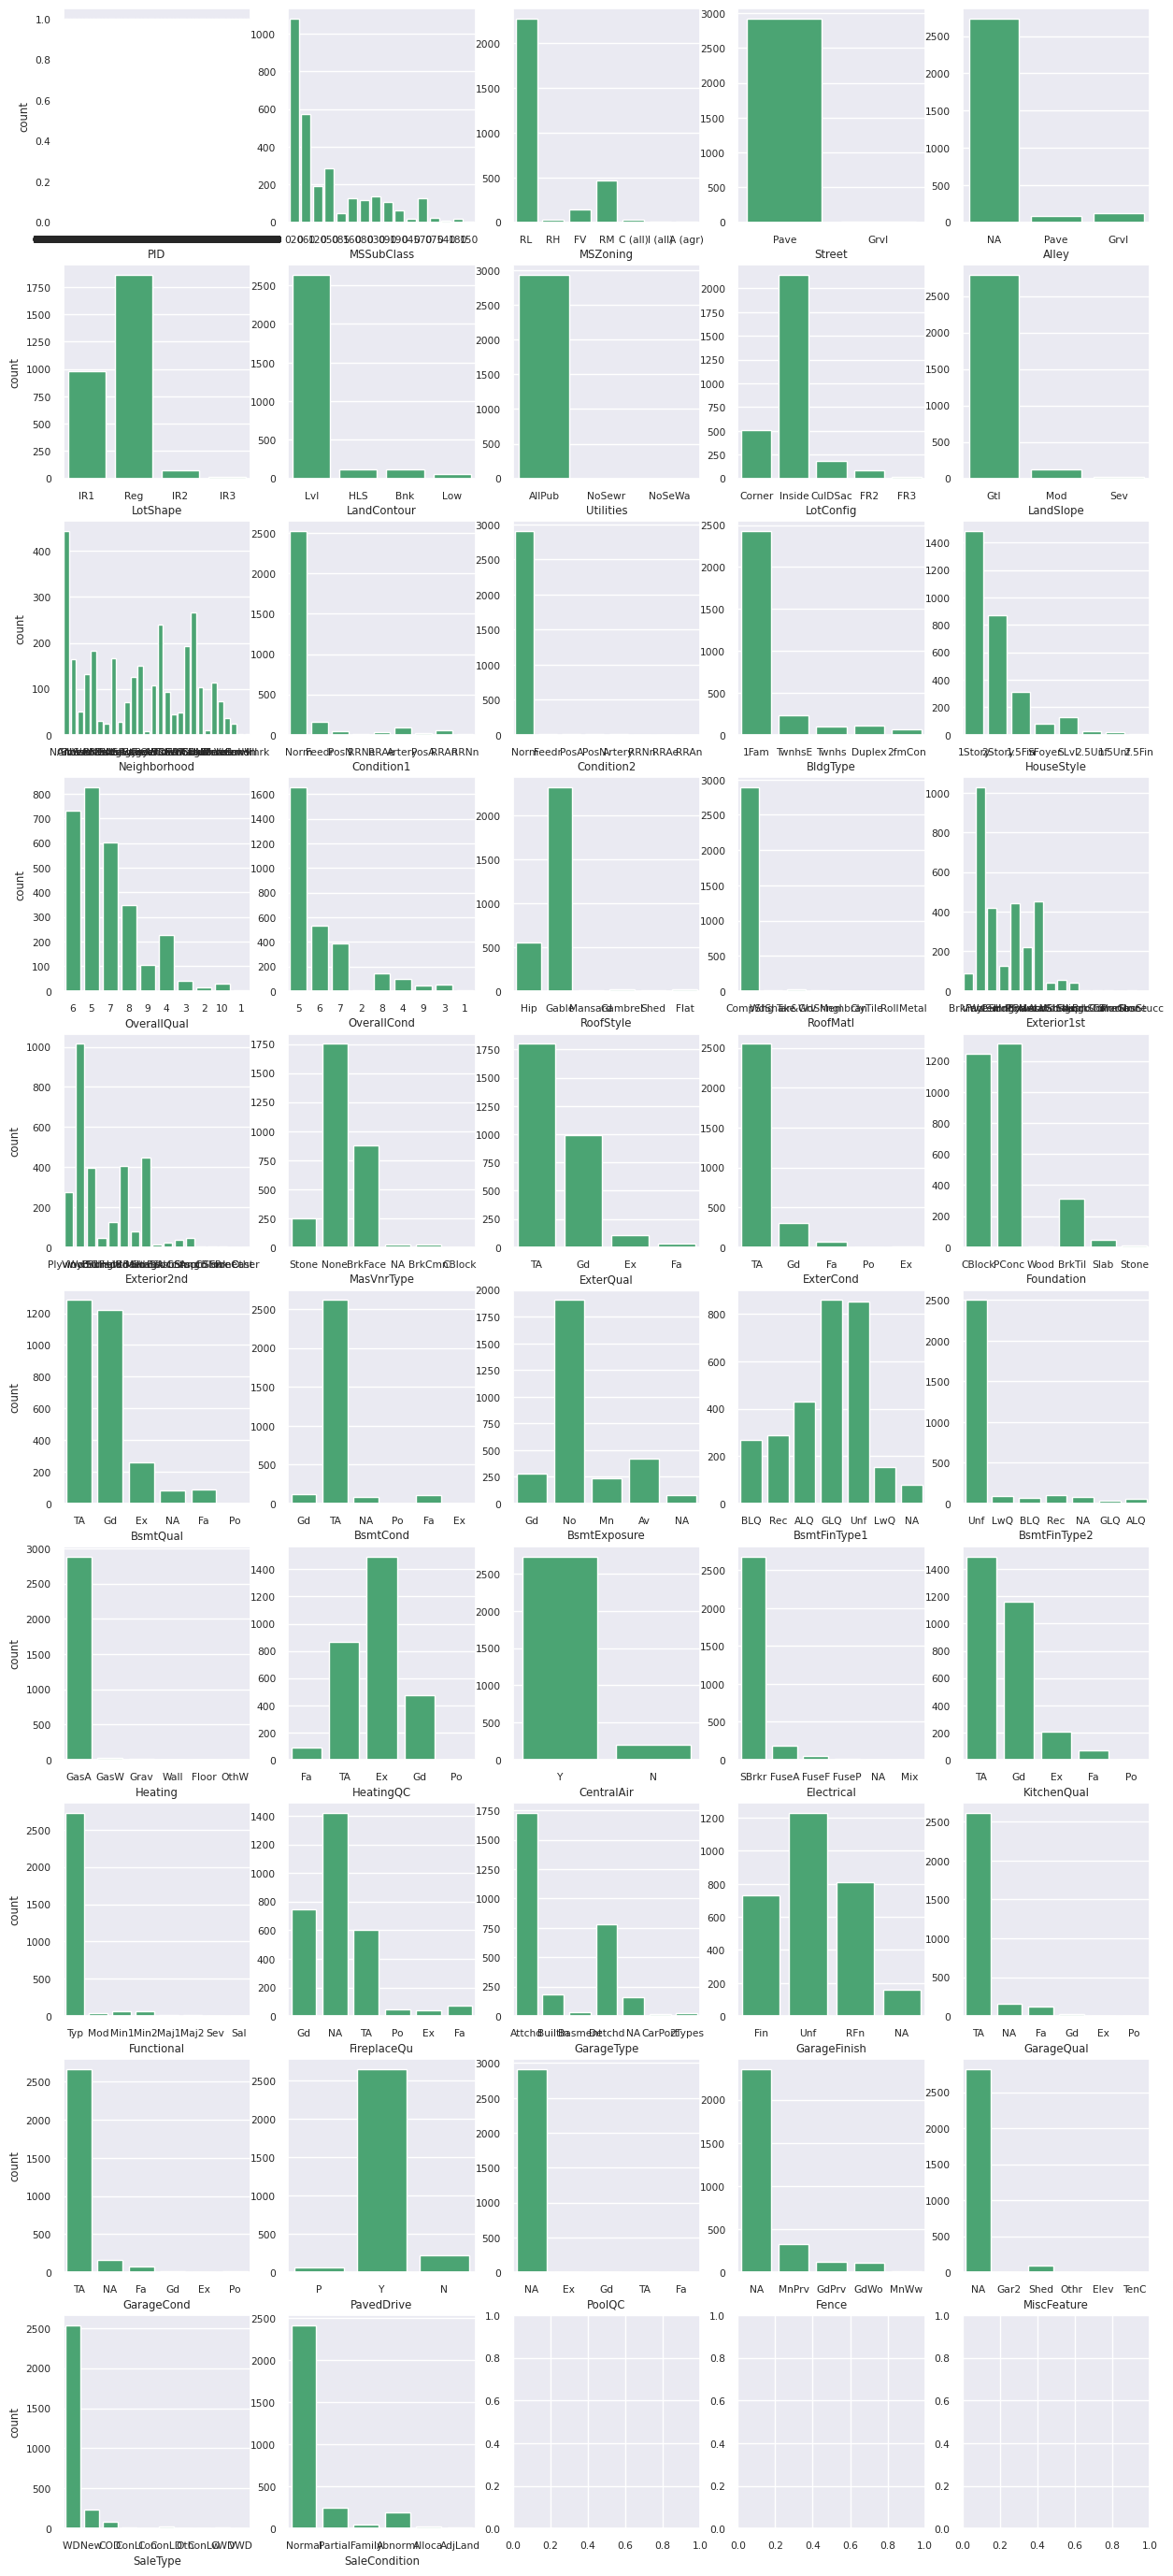

In [21]:
fig, axs = plt.subplots(10, 5, figsize=(15,10*3.5))
for i in range(len(columns_categorical)):
    ax = axs[i//5, i%5]
    sns.countplot(x=ames[columns_categorical[i]], color=snscolor, ax=ax)
    if i%5 != 0: ax.set_ylabel("")

Interpretation: nothing of interest. The PID is the second key (as mentioned above), it would make sense to remove it from this figure.

### Bivariate EDA and Outlier removal

A reasonable next step is look at the relationship between the target and some of the features we know from our domain knowledge to be important. To keep the number of graphs (and runtime) reasonable, we selected the four features `GrLivArea`, `YearBuilt`, `LotArea`, `TotRmsAbvGrd` plus the target `SalePrice`.

### Exercise I.4

* Visualize these feature with a pair plot. 
* Interpret the visualizations, in particular, look for Outliers. 

In [22]:
#---------- SOLUTION ----------

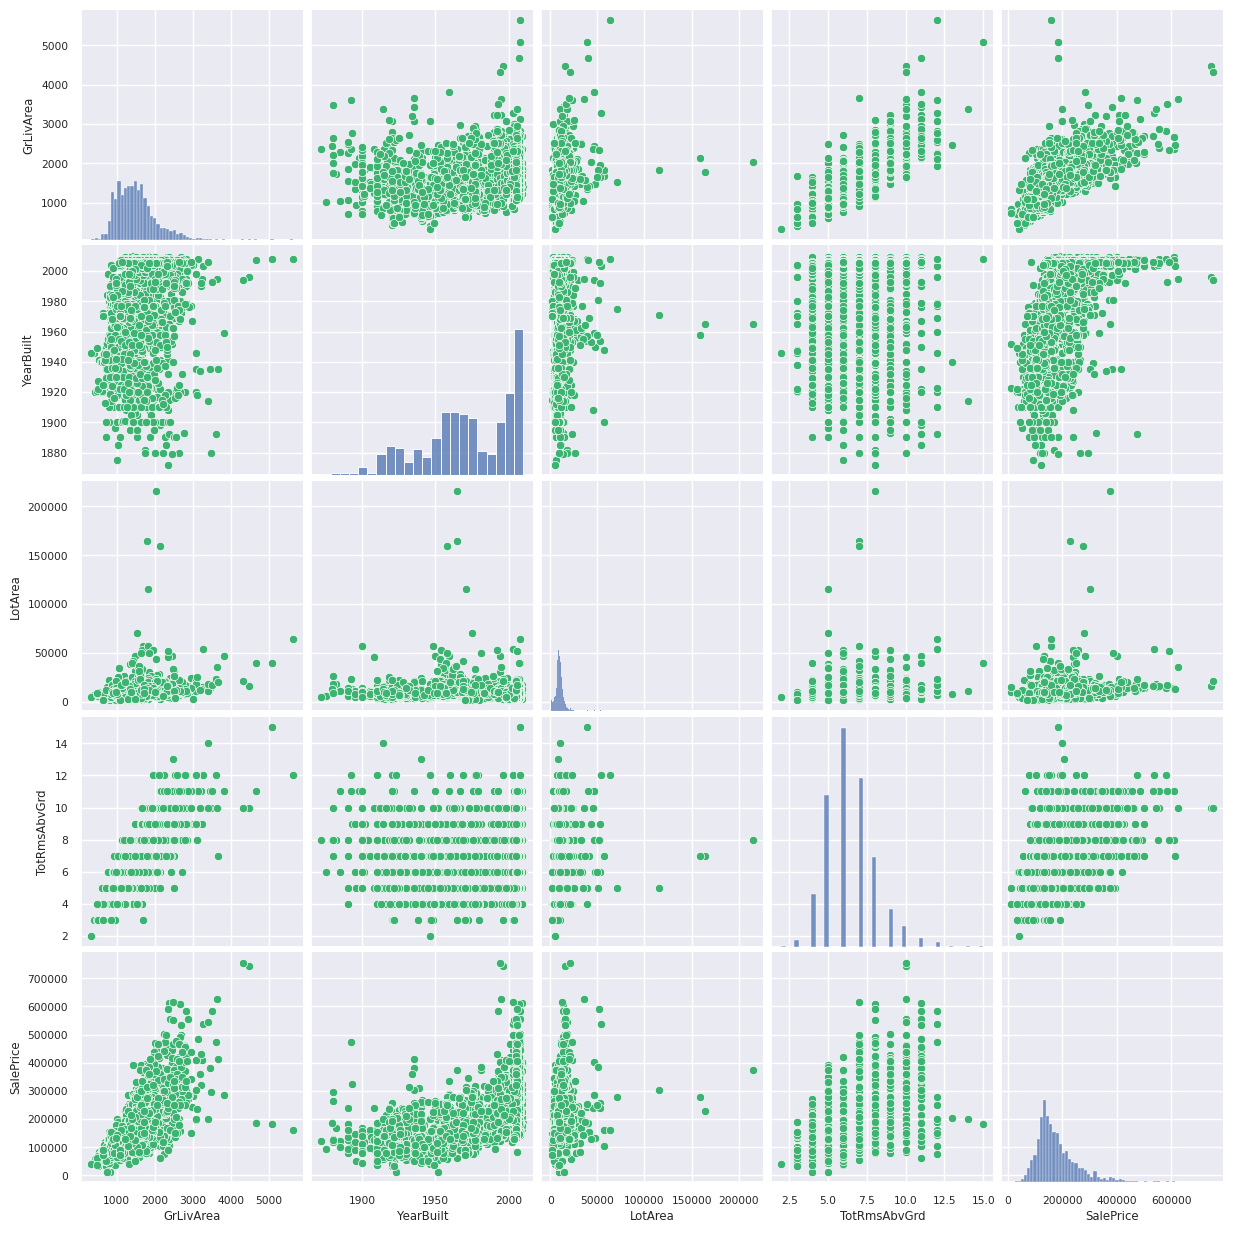

In [23]:
_=sns.pairplot(data=ames, vars=['GrLivArea', 'YearBuilt', 'LotArea', 'TotRmsAbvGrd', 'SalePrice'], plot_kws={'color':snscolor})

Interpretation: Looking at the `SalesPrice` vs. `GrLivArea` scatterplot, we note five outliers. There are two properties that have extremely high prices and high living areas. They are probably legitimate data points, but outside the range of the other data points, so we decide to remove them as they may have a adverse effect on the quality of our model. Furthermore, there are three data points with very high living areas but quite low prices - these are strange. Due to the low number, we will simply remove them as well, this should not introduce much bias in our model. 

Note that we can easily remove all five outliers by removing all properties with `GrLivArea` > 4000.

In addition, there are 4 data points with very high ´LotArea´s for their price. They may very well be legitimate data points. As their `GrLivArea` does **not** stand out, we will leave them in but note, that it may make sense to re-run our model training later on without them and compare the result.

### Exercise I.5

You should have found 5 very obvious Outliers (plus a few more that are not that clearly anomalous). 

* Decide what to do with the Outliers
* Implement your solution

In [24]:
#---------- SOLUTION ----------

In [25]:
ames = ames[ames.GrLivArea<4000] # remove outliers

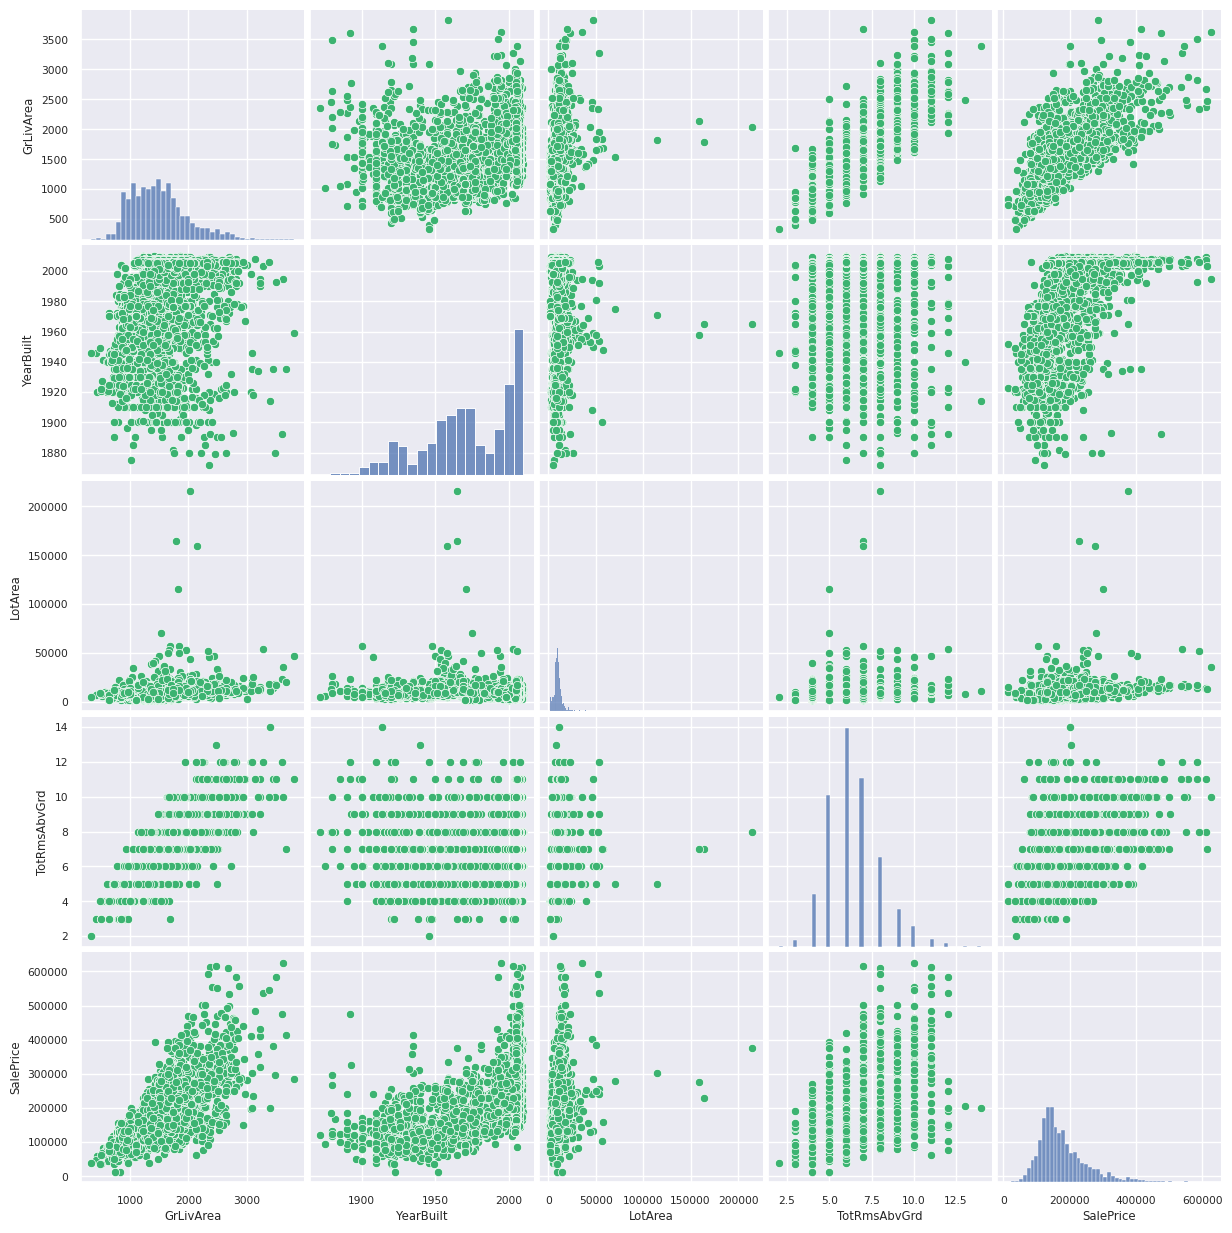

In [26]:
_=sns.pairplot(data=ames, vars=['GrLivArea', 'YearBuilt', 'LotArea', 'TotRmsAbvGrd', 'SalePrice'], plot_kws={'color':snscolor})

### Save the cleaned dataframe for later

### Exercise I.6

* Save ('pickle') the cleaned dataframe to `"data/AmesHousingHomeworkSolution.pkl"`

In [27]:
#---------- SOLUTION ----------

In [28]:
ames.to_pickle("data/AmesHousingClean.pkl")

------